In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read csv file and create df variable
df = pd.read_csv("surv_variants.csv")

In [3]:
#Descriptive Stats
print(df.describe())

#Identify Outliers
print(df.info())

           num_seqs     duration  mortality_rate   total_cases   total_deaths  \
count  4.113000e+03  4113.000000     4113.000000  4.113000e+03    4113.000000   
mean   4.216428e+03   182.552638        0.019360  1.198316e+05    2118.266613   
std    3.971929e+04   161.950948        0.014504  1.027564e+06   15801.688542   
min    1.000000e+00     0.000000        0.000000  2.015926e-04       0.000000   
25%    4.000000e+00    39.000000        0.010835  1.349603e+02       1.948052   
50%    3.000000e+01   155.000000        0.016106  1.280419e+03      20.188889   
75%    2.700000e+02   280.000000        0.024168  1.435006e+04     248.201653   
max    1.289311e+06   669.000000        0.145330  3.597978e+07  513790.255546   

         growth_rate  
count    3585.000000  
mean    11682.192504  
std     41524.513816  
min         0.000000  
25%       154.923372  
50%       882.398620  
75%      3827.861639  
max    600412.400000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries,

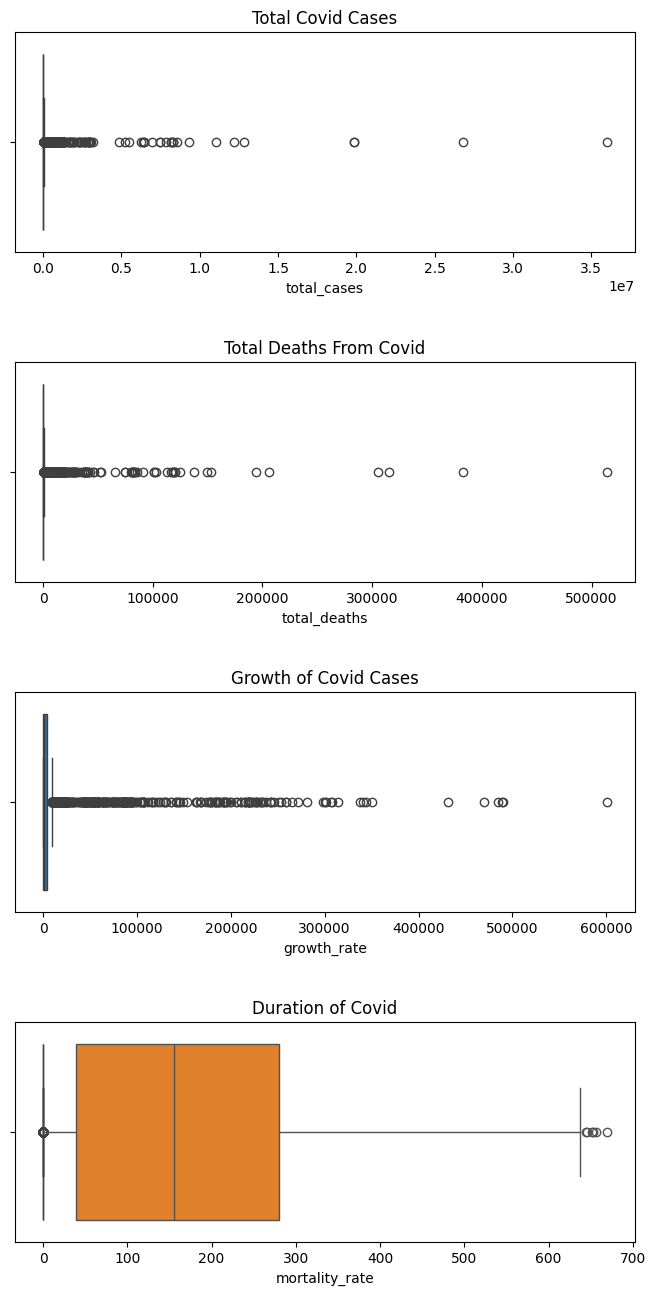

In [4]:
#Plot Numerical figure
plt.figure(figsize=(8, 20))

#Covid Cases
plt.subplot(5, 1, 1)
sns.boxplot(x=df['total_cases'])
plt.title('Total Covid Cases')

#Covid Deaths
plt.subplot(5, 1, 2)
sns.boxplot(x=df['total_deaths'])
plt.title('Total Deaths From Covid')

#Growth of Covid
plt.subplot(5, 1, 3)
sns.boxplot(x=df['growth_rate'])
plt.title('Growth of Covid Cases')

#Mortality of Covid
plt.subplot(5, 1, 4)
sns.boxplot(x=df['mortality_rate'])
plt.title('Mortality of Covid')

#Duration of Covid
plt.subplot(5, 1, 4)
sns.boxplot(x=df['duration'])
plt.title('Duration of Covid')


#Plot
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
#Start of Data Cleaning

#Remove duplicates
df_cleaned = df.drop_duplicates()

#Handle Missing Values (Only Growth Rate has Null) - Imputation
#Median imputation, for skewed data
df_cleaned["growth_rate"] = df_cleaned["growth_rate"].fillna(df_cleaned["growth_rate"].median())

#No need to Handle Outliers as covid affected places very differently, whether due to poor/rich countries or other variables 
#Kurtosis, data is right skewed, but do not need to change
#df_cleaned["growth_rate"] = np.sqrt(df_cleaned["growth_rate"]+1)
#df_cleaned["total_deaths"] = np.sqrt(df_cleaned["total_deaths"]+1) 
#df_cleaned["total_cases"] = np.sqrt(df_cleaned["total_cases"]+1) 

#Remove irrelevant Information
df_cleaned = df_cleaned.drop(columns=['num_seqs'], axis=1)

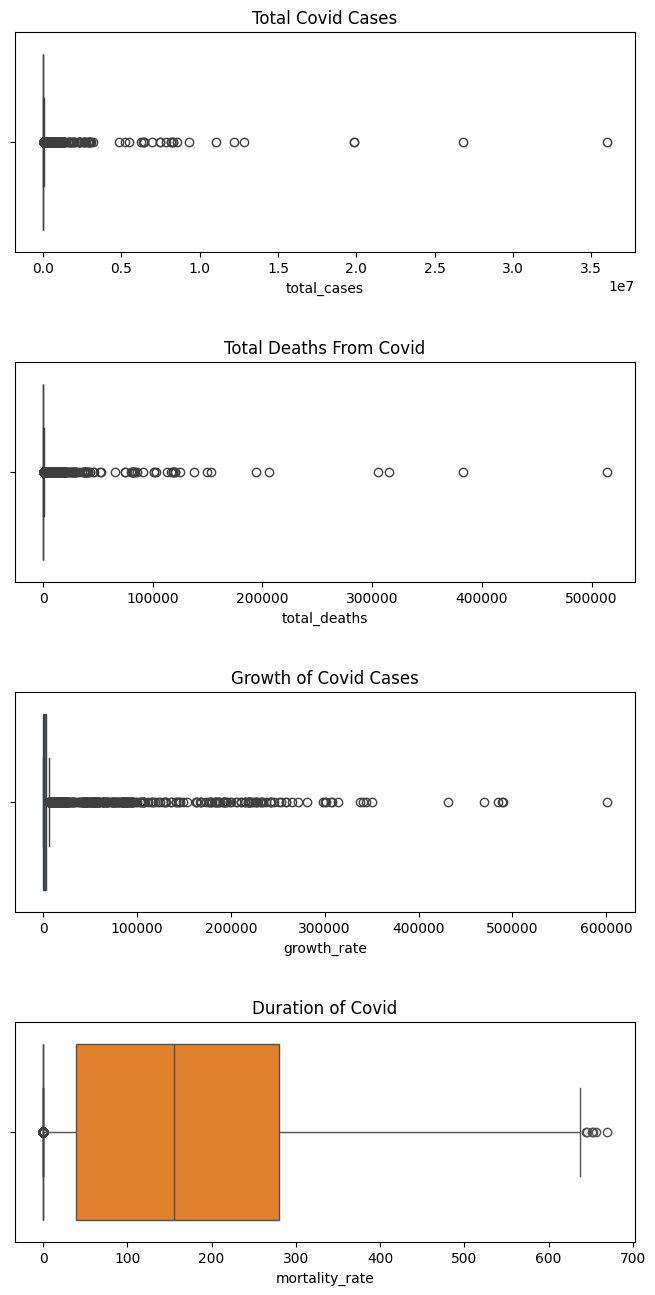

In [6]:
#Plot Numerical figure
plt.figure(figsize=(8, 20))

#Covid Cases
plt.subplot(5, 1, 1)
sns.boxplot(x=df_cleaned['total_cases'])
plt.title('Total Covid Cases')

#Covid Deaths
plt.subplot(5, 1, 2)
sns.boxplot(x=df_cleaned['total_deaths'])
plt.title('Total Deaths From Covid')

#Growth of Covid
plt.subplot(5, 1, 3)
sns.boxplot(x=df_cleaned['growth_rate'])
plt.title('Growth of Covid Cases')

#Mortality of Covid
plt.subplot(5, 1, 4)
sns.boxplot(x=df_cleaned['mortality_rate'])
plt.title('Mortality of Covid')

#Duration of Covid
plt.subplot(5, 1, 4)
sns.boxplot(x=df_cleaned['duration'])
plt.title('Duration of Covid')

#Plot
plt.subplots_adjust(hspace=0.5)
plt.show()

df_cleaned.to_csv('surv_variants_cleaned.csv', index=False)